In [37]:
import pandas as pd
import numpy as np
import dvc.api
import seaborn as sns
import matplotlib.pyplot as plt
import logging

In [38]:
#Create and configure logger
logging.basicConfig(filename="newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')

In [39]:
#Creating an object
logger=logging.getLogger()

In [40]:
path = ['data/store.csv', 'data/train.csv', 'data/test.csv']
version = ['store_v1', 'train_v1', 'test_v1']

In [41]:
    repo = '/home/michael/Pharmaceutical-Sales-prediction-across-multiple-stores'
    data_url = dvc.api.get_url(
        path = path[0],
        repo = repo,
        rev=version[0]
        )
    data_url2 = dvc.api.get_url(
        path = path[1],
        repo = repo,
        rev=version[1]
        )
    data_url3 = dvc.api.get_url(
        path = path[2],
        repo = repo,
        rev=version[2]
        )

    df_store = pd.read_csv(data_url)
    df_train = pd.read_csv(data_url2)
    df_test = pd.read_csv(data_url3)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [42]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [43]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [44]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [46]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [47]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [48]:
len(df_train)

1017209

In [49]:
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day
df_train['WeekOftheYear'] = df_train['Date'].dt.weekofyear

<ipython-input-49-667405014bab>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_train['WeekOftheYear'] = df_train['Date'].dt.weekofyear


In [50]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOftheYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


In [51]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
WeekOftheYear    0
dtype: int64

In [52]:
df_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [53]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [54]:
len(df_store)

1115

In [55]:
# impute the missing value in store data
df_test['Open'].fillna(df_test['Open'].mode, inplace = True)
df_test.isnull().values.any()

False

In [56]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [57]:
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [58]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [59]:
df_store1 = df_store.copy()

In [60]:
df_store['Promo2SinceWeek'].fillna(df_store['Promo2SinceWeek'].mode, inplace = True)
df_store['Promo2SinceYear'].fillna(df_store['Promo2SinceYear'].mode, inplace = True)
df_store['PromoInterval'].fillna(df_store['PromoInterval'].mode, inplace = True)
df_store.isnull().values.any()

True

In [61]:
# impute the missing values in store data
df_store['CompetitionOpenSinceMonth'].fillna(df_store['CompetitionOpenSinceMonth'].mode, inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(df_store['CompetitionOpenSinceYear'].mode, inplace = True)
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)
df_store.isnull().values.any()

False

In [62]:
store_train = pd.merge(df_train, df_store, how = 'inner', on = 'Store')

In [63]:
store_train.groupby('StoreType')['Customers', 'Sales'].sum()

<ipython-input-63-5222cd9f3be2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_train.groupby('StoreType')['Customers', 'Sales'].sum()


,Customers,Sales
StoreType,,
a,363541434,3165334859
b,31465621,159231395
c,92129705,783221426
d,156904995,1765392943


In [64]:
# Create a Day of Week feature
store_train['day_of_week'] = store_train['Date'].dt.day_name()

In [65]:
store_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'WeekOftheYear', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'day_of_week'],
      dtype='object')

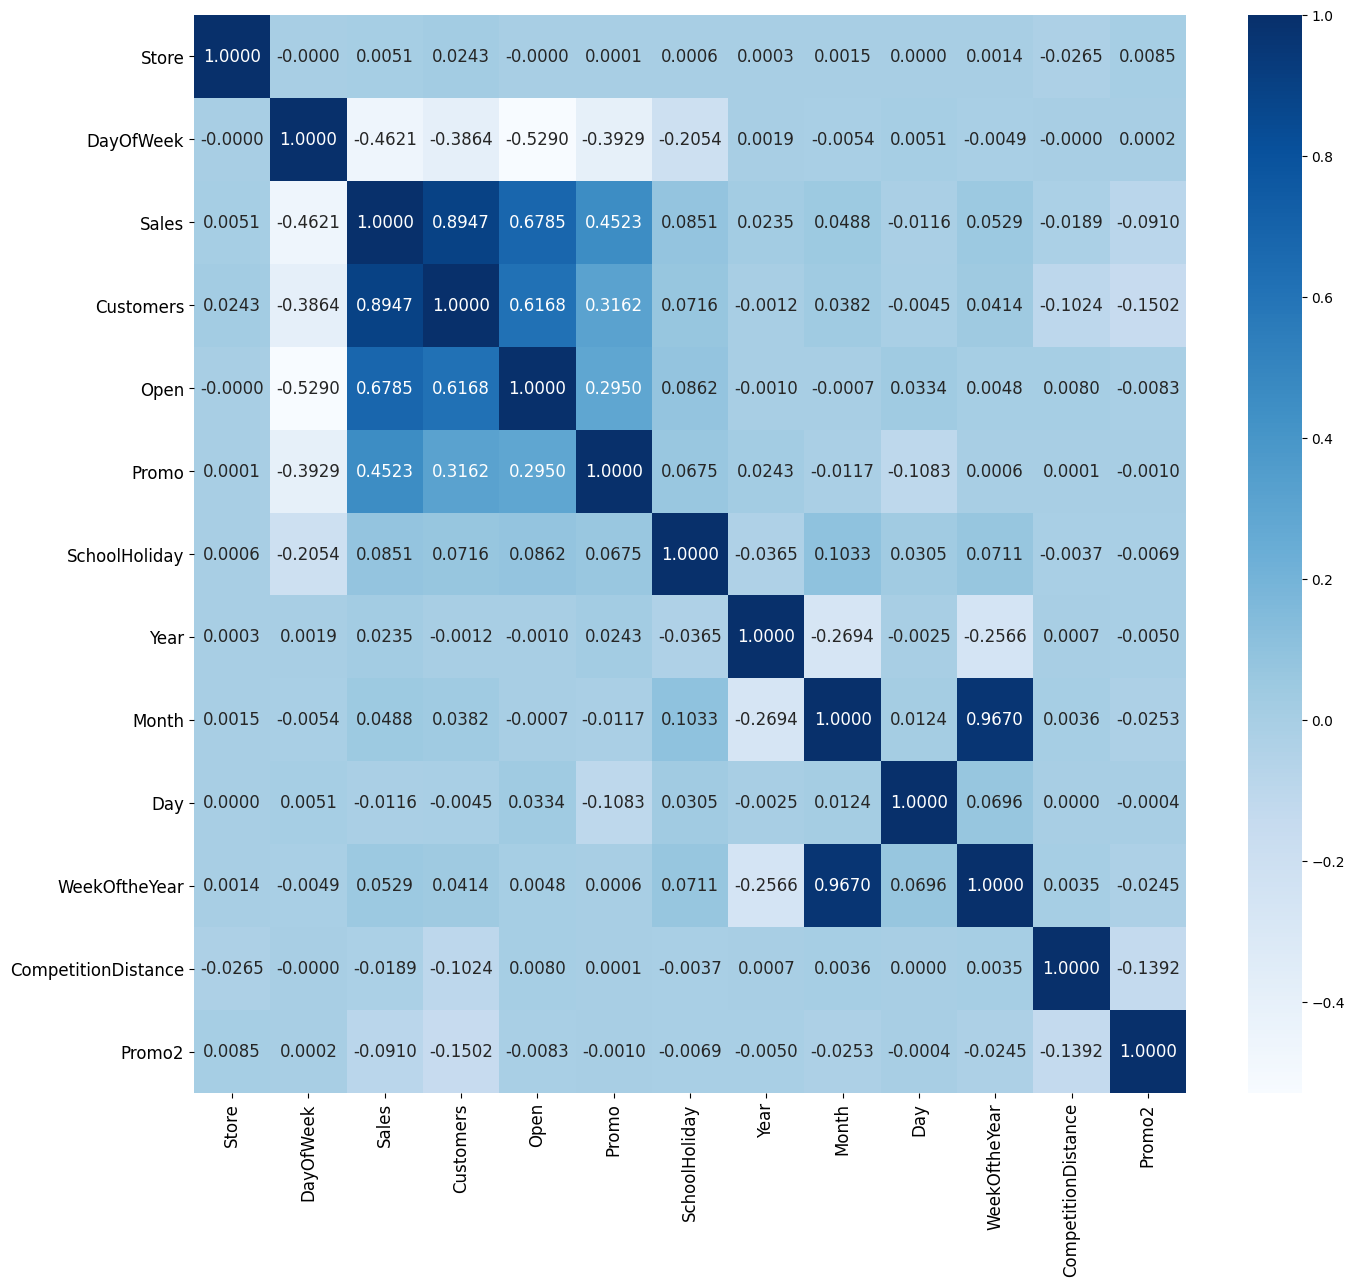

In [66]:
#correlation matrix
corrMatrix= store_train.corr()
f, ax = plt.subplots(figsize=(16, 14))
res=sns.heatmap(corrMatrix,cmap="Blues",annot=True,fmt='.4f',annot_kws={"size":12})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
plt.show()

In [69]:
len(df_train.Store.value_counts())

1115

In [70]:
stores = df_train.groupby('Store')

In [71]:
stores_total = stores['Sales'].sum()

In [72]:
stores_total.head()

Store
1    3716854
2    3883858
3    5408261
4    7556507
5    3642818
Name: Sales, dtype: int64

In [120]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    sns.displot(data=df, x=column, color=color, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.xticks(rotation=90)
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_counts(df:pd.DataFrame, column1:str) -> None:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=df, x=column1)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {column1}', size=20, fontweight='bold')
    plt.show()

In [74]:
train_store = pd.merge(df_train, df_store, how = 'inner', on = 'Store')

In [75]:
week_day_df = store_train.groupby('day_of_week')

In [76]:
week_day_df['Customers'].value_counts()

day_of_week  Customers
Friday       0            7212
             646           470
             619           458
             555           450
             560           443
                          ... 
Wednesday    4315            1
             4356            1
             4424            1
             4438            1
             5106            1
Name: Customers, Length: 20285, dtype: int64

In [82]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'WeekOftheYear'],
      dtype='object')

In [83]:
df_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [91]:
train_promo = df_train.Promo
test_promo = df_test.Promo
promo = pd.DataFrame()
promo['train promo'] = df_train.Promo
promo['test promo'] = df_test.Promo

In [92]:
promo.head()

,train promo,test promo
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0


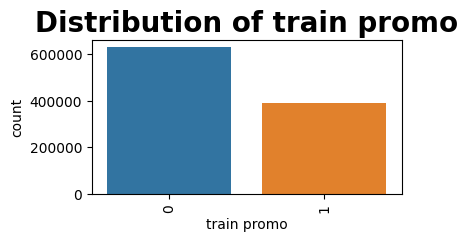

In [121]:
# Distribution of train promotion
plot_counts(promo, 'train promo')

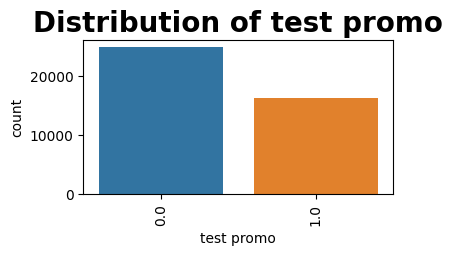

In [122]:
# Distribution of test promotion
plot_counts(promo, 'test promo')

In [132]:
(promo['test promo'].value_counts().tolist()[0]/promo['test promo'].value_counts().tolist()[1],
promo['train promo'].value_counts().tolist()[0]/promo['train promo'].value_counts().tolist()[1])

(1.5263157894736843, 1.6211322407750979)

In [174]:
len(promo[promo['test promo'] == 0])/len(promo[promo['test promo']==1])

1.5263157894736843

In [175]:
len(promo[promo['train promo'] == 0])/len(promo[promo['train promo']==1])

1.6211322407750979

In [166]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  Day            1017209 non-null  int64         
 12  WeekOftheYear  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 100.9+ MB


In [201]:
#check seasonality for the given store
def seasonality(store):
    sale = df_train[df_train.Store == store]
    sale = sale[(sale.Year == 2015) | (sale.Year == 2014) | (sale.Year == 2013)]
    sale = sale.sort_values(by = "Date",ascending= False)
    sns.set(rc = {'figure.figsize':(20,8)})
    sns.lineplot(x = sale["Date"], y = sale["Sales"], color = 'red')
    plt.xticks(rotation=90)
    plt.title(f'seasonality of store {store}', size=20, fontweight='bold')
    plt.xlabel('Date', fontsize=18, fontweight = 'bold')
    plt.ylabel('Sales', fontsize=16, fontweight = 'bold')
    plt.show()

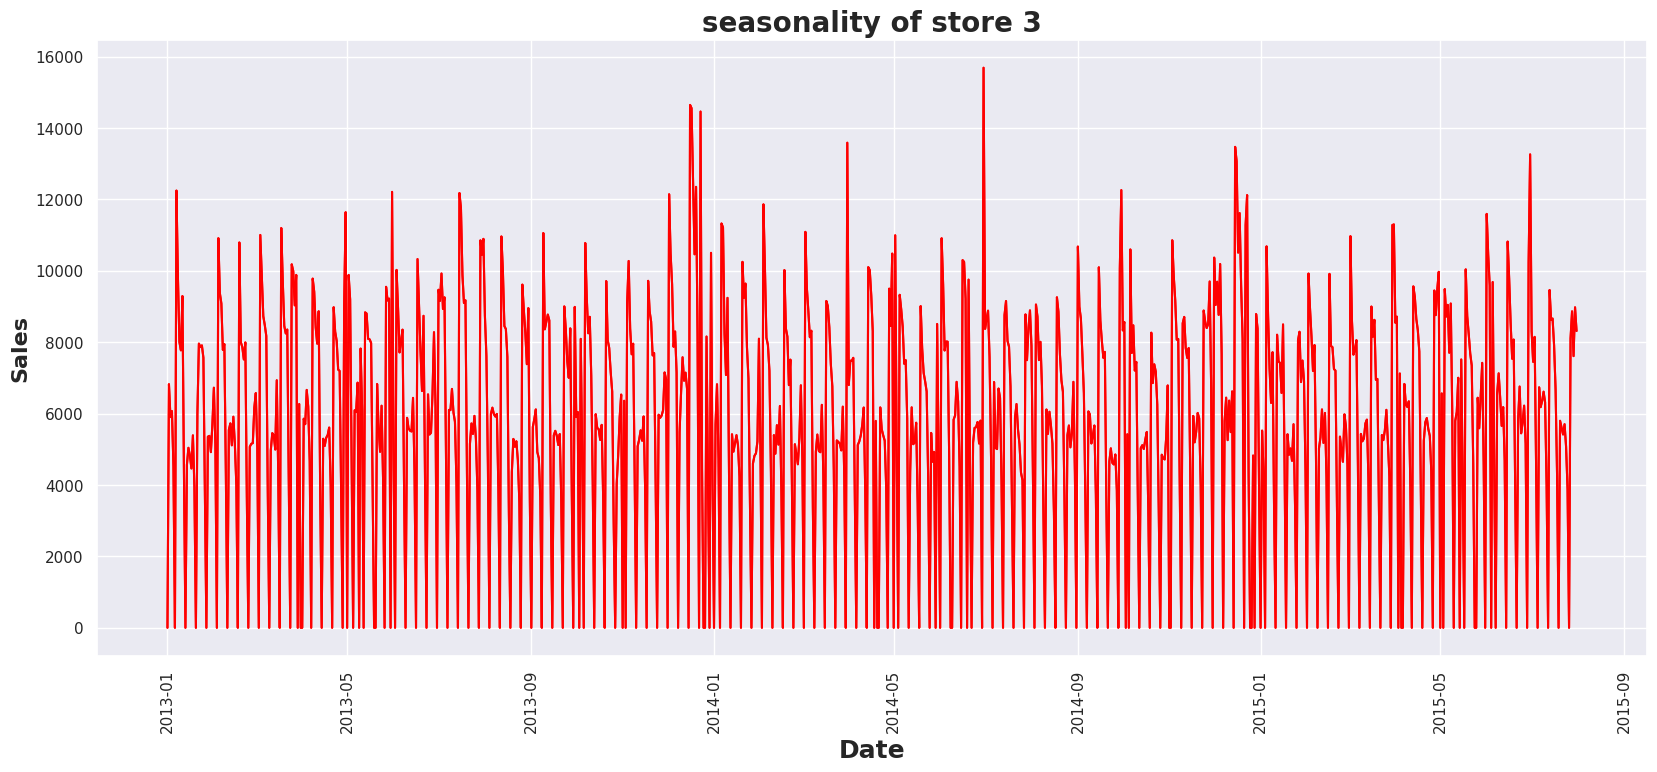

In [202]:
seasonality(3)

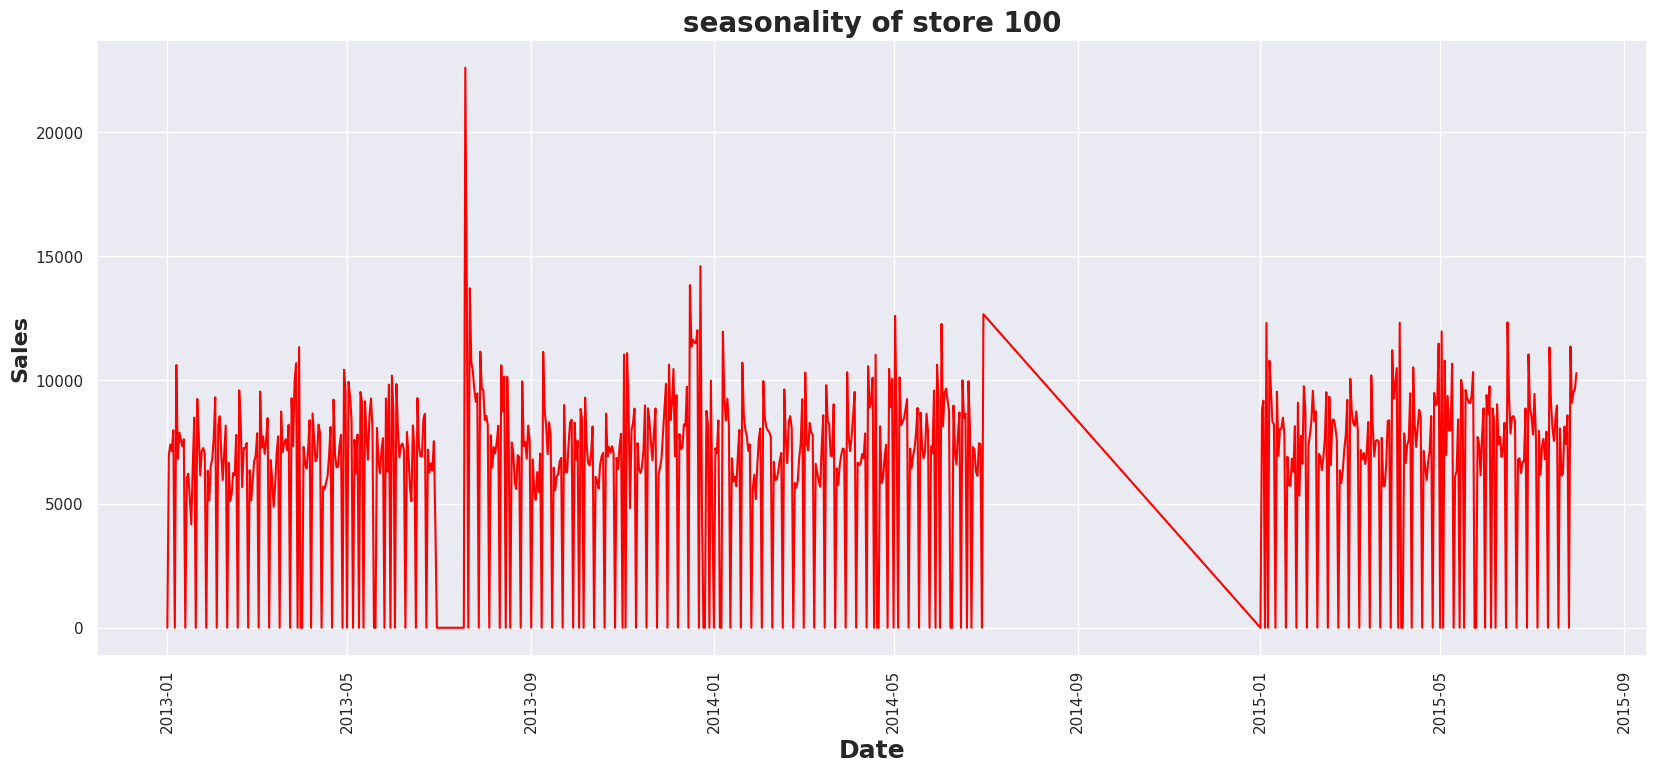

In [203]:
seasonality(100)

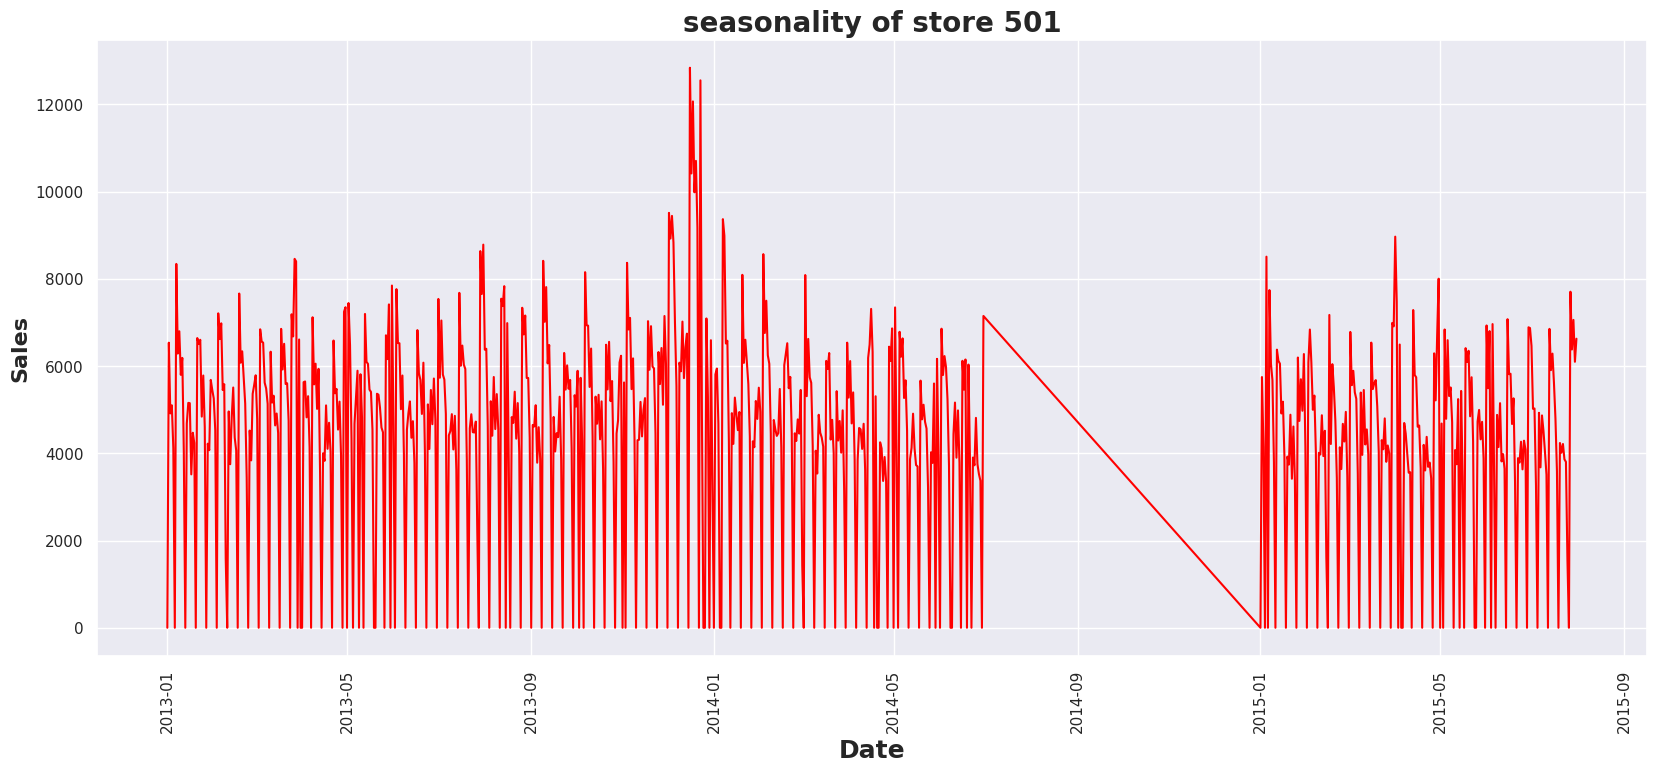

In [204]:
seasonality(501)

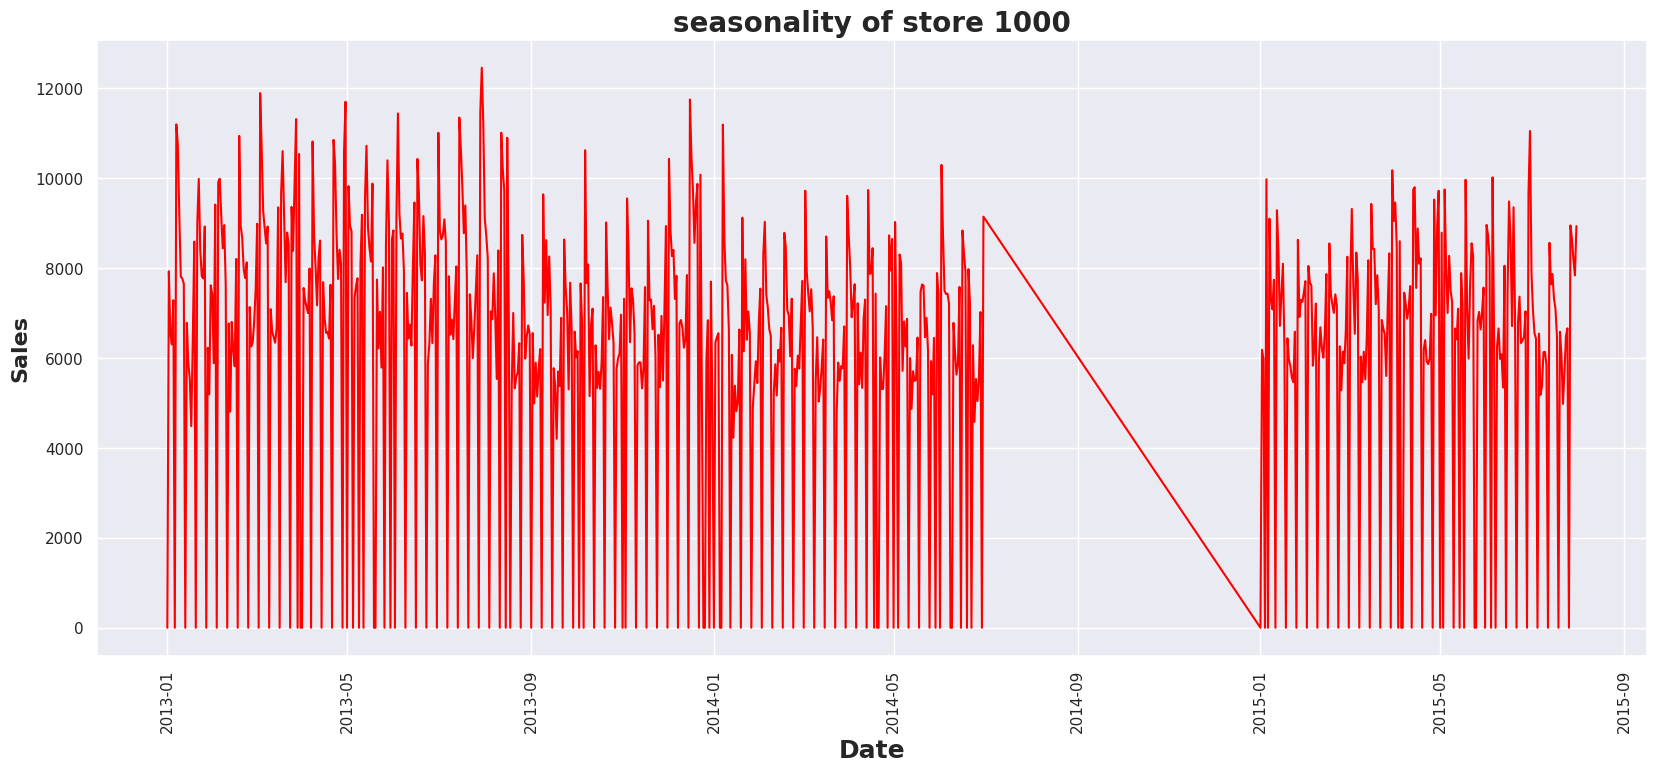

In [205]:
seasonality(1000)

In [182]:
store_1000 = df_train.groupby('Store').get_group(1000)

In [207]:
store_1000.head(100)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOftheYear
999,1000,5,2015-07-31,8935,749,1,1,0,0,2015,7,31,31
2114,1000,4,2015-07-30,7840,727,1,1,0,0,2015,7,30,31
3229,1000,3,2015-07-29,8193,645,1,1,0,0,2015,7,29,31
4344,1000,2,2015-07-28,8648,709,1,1,0,0,2015,7,28,31
5459,1000,1,2015-07-27,8951,742,1,1,0,0,2015,7,27,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106924,1000,1,2015-04-27,9524,812,1,1,0,0,2015,4,27,18
108039,1000,7,2015-04-26,0,0,0,0,0,0,2015,4,26,17
109154,1000,6,2015-04-25,6984,673,1,0,0,0,2015,4,25,17
110269,1000,5,2015-04-24,5995,580,1,0,0,0,2015,4,24,17


In [206]:
store_1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 999 to 1017093
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          758 non-null    int64         
 1   DayOfWeek      758 non-null    int64         
 2   Date           758 non-null    datetime64[ns]
 3   Sales          758 non-null    int64         
 4   Customers      758 non-null    int64         
 5   Open           758 non-null    int64         
 6   Promo          758 non-null    int64         
 7   StateHoliday   758 non-null    object        
 8   SchoolHoliday  758 non-null    int64         
 9   Year           758 non-null    int64         
 10  Month          758 non-null    int64         
 11  Day            758 non-null    int64         
 12  WeekOftheYear  758 non-null    int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 82.9+ KB


In [164]:
store_100.info

0    1
1    2
2    3
3    4
4    5
Name: Store, dtype: int64

In [ ]:
store_1000.